In [1]:
import baccoemu
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import scipy
import warnings

import sys
sys.path.append('/dipc/kstoreyf/muchisimocks/scripts')
import plot_utils
import plotter
import utils
import data_loader

%load_ext autoreload
%autoreload 2

2025-04-01 01:27:55.907225: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-01 01:27:56.007055: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-01 01:27:56.007097: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-01 01:27:56.019697: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-01 01:27:56.049598: I tensorflow/core/platform/cpu_feature_guar

In [2]:
%matplotlib inline
mpl.pyplot.style.use('default')
mpl.pyplot.close('all')

font, rcnew = plot_utils.matplotlib_default_config()
mpl.rc('font', **font)
mpl.pyplot.rcParams.update(rcnew)
mpl.pyplot.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

In [3]:
data_mode = 'muchisimocksPk'
assert data_mode in ['emuPk', 'muchisimocksPk']

idxs_obs = [0]

In [4]:
#tag_flow = '_nsf'
tag_flow = ''

In [ ]:
### Training data
n_train = 10000
tag_params = '_p5_n10000'
tag_biasparams = '_b1000_p0_n1'
#tag_biasparams = '_biaszen_p4_n10000'
tag_datagen = ''
tag_data_train = '_'+data_mode + tag_params + tag_biasparams + tag_datagen
mask = data_loader.get_Pk_mask(tag_data_train)
print(mask)
tag_inf = f'{tag_data_train}_ntrain{n_train}{tag_flow}'
# only need kwargs here if want to investivate the training data; otherwise only
# need tag to load model
kwargs_data_train = {'tag_datagen': tag_datagen}

print(tag_data_train)
print(tag_inf)

fn_mask: ../data/masks/mask_muchisimocksPk_p5_n10000_b1000_p0_n1.txt
Loading from ../data/masks/mask_muchisimocksPk_p5_n10000_b1000_p0_n1.txt (already exists)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False]
_muchisimocksPk_p5_n10000_b1000_p0_n1
_muchisimocksPk_p5_n10000_b1000_p0_n1_ntrain10000


In [ ]:
# load training set parameters 
params_df, param_dict_fixed, biasparams_df, biasparams_dict_fixed, random_ints, random_ints_bias = data_loader.load_params(tag_params, tag_biasparams)

# for muchisimocks, we will probably want to vary the same params as the training data
cosmo_param_names_vary, bias_param_names_vary = [], []
if params_df is not None:
    cosmo_param_names_vary = params_df.columns.tolist()
# TODO should this be test or train?
if biasparams_df is not None:
    bias_param_names_vary = biasparams_df.columns.tolist()
param_names_vary = cosmo_param_names_vary + bias_param_names_vary
param_labels = [utils.param_label_dict[param_name] for param_name in param_names_vary]

In [ ]:
### Set up test data

# load fixed-cosmo test set
tag_params_test = '_quijote_p0_n1000'
tag_biasparams_test = '_b1000_p0_n1'
tag_datagen_test = ''
tag_data_test_fixed = '_'+data_mode + tag_params_test + tag_biasparams_test + tag_datagen_test
print(tag_data_test_fixed)
theta_test_fixed = data_loader.load_theta_test(tag_params_test, tag_biasparams_test, 
                                cosmo_param_names_vary=cosmo_param_names_vary, bias_param_names_vary=bias_param_names_vary)
print(theta_test_fixed.shape)

# load test set matched to training sest
tag_params_test = '_test_p5_n1000'
tag_biasparams_test = tag_biasparams
tag_datagen_test = ''
tag_data_test = '_'+data_mode + tag_params_test + tag_biasparams_test + tag_datagen_test
print(tag_data_test)
theta_test = data_loader.load_theta_test(tag_params_test, tag_biasparams_test)
print(theta_test.shape)


_muchisimocksPk_quijote_p0_n1000_b1000_p0_n1
(5,)
_muchisimocksPk_test_p5_n1000_b1000_p0_n1
(1000, 5)


# Check SBI training

In [11]:
import pickle
dir_sbi = f'../results/results_sbi/sbi{tag_inf}'

fn_inference = f'{dir_sbi}/inference.p'
with open(fn_inference, "rb") as f:
    inference = pickle.load(f)

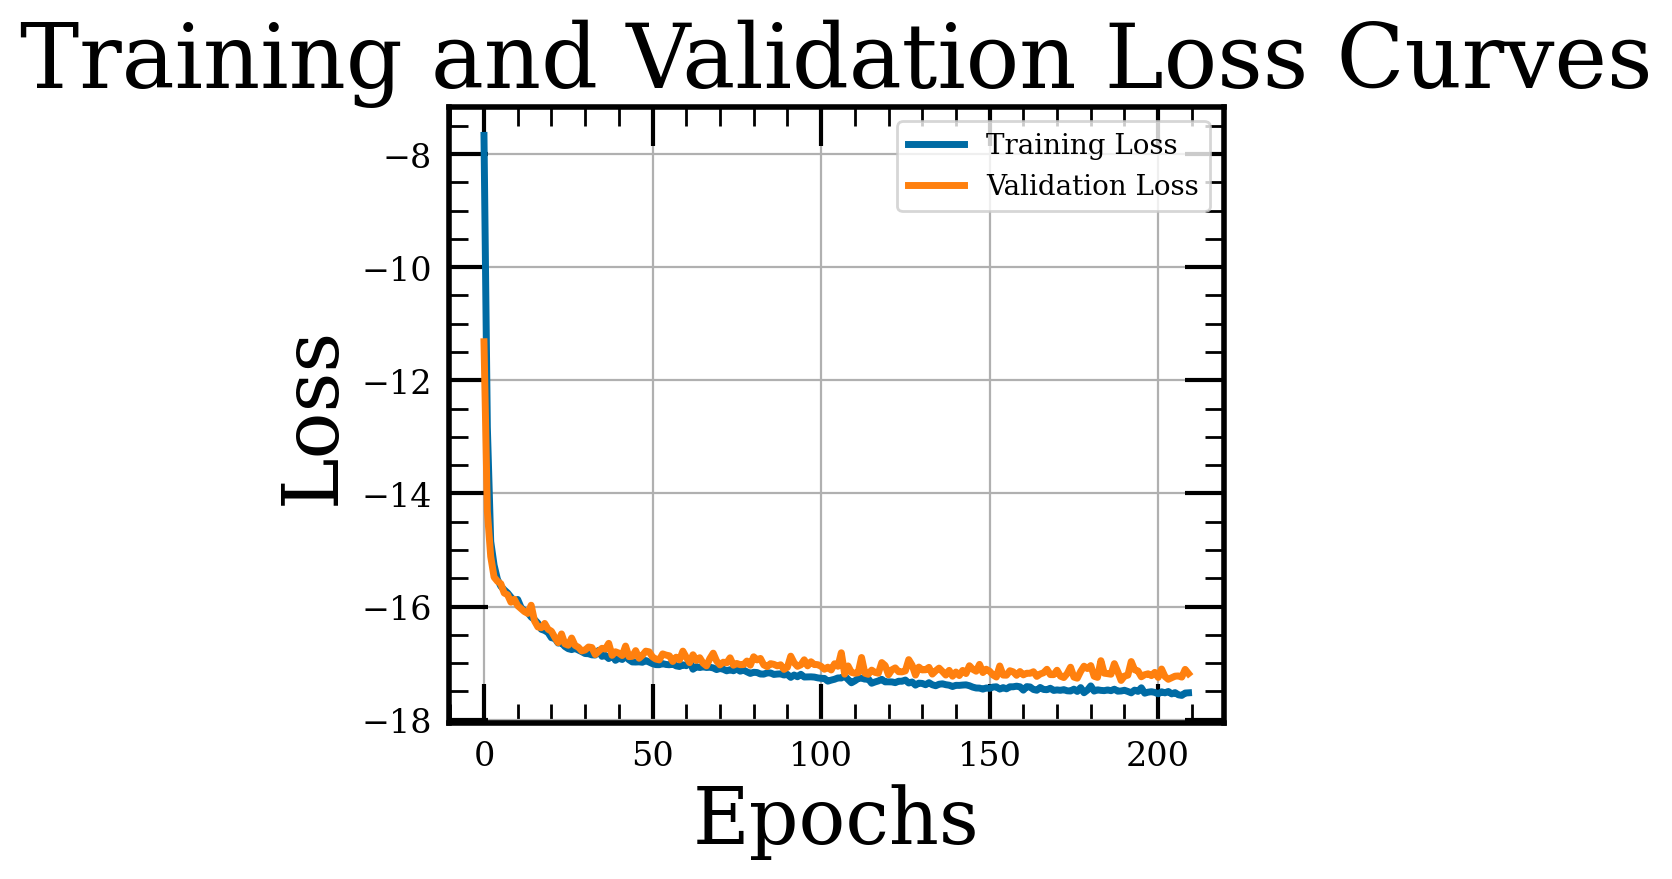

In [12]:
# Extract training and validation loss
training_loss = inference._summary["training_loss"]
validation_loss = inference._summary["validation_loss"]

# Plot the loss curves
plt.figure(figsize=(5, 4))
plt.plot(training_loss, label="Training Loss")
plt.plot(validation_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Curves")
plt.legend(fontsize=10)
#plt.ylim(-10.5, -10)
plt.grid(True)

## Contour plot for fixed-cosmo sample

For settings above

[0.3175 0.834  0.6711 0.049  0.9624]
['omega_cold', 'sigma8_cold', 'hubble', 'omega_baryon', 'ns']
fn_samples = ../results/results_sbi/sbi_muchisimocksPk_p5_n10000_b1000_p0_n1_ntrain10000/samples_test_muchisimocksPk_quijote_p0_n1000_b1000_p0_n1_mean_pred.npy
(10000, 1, 5)


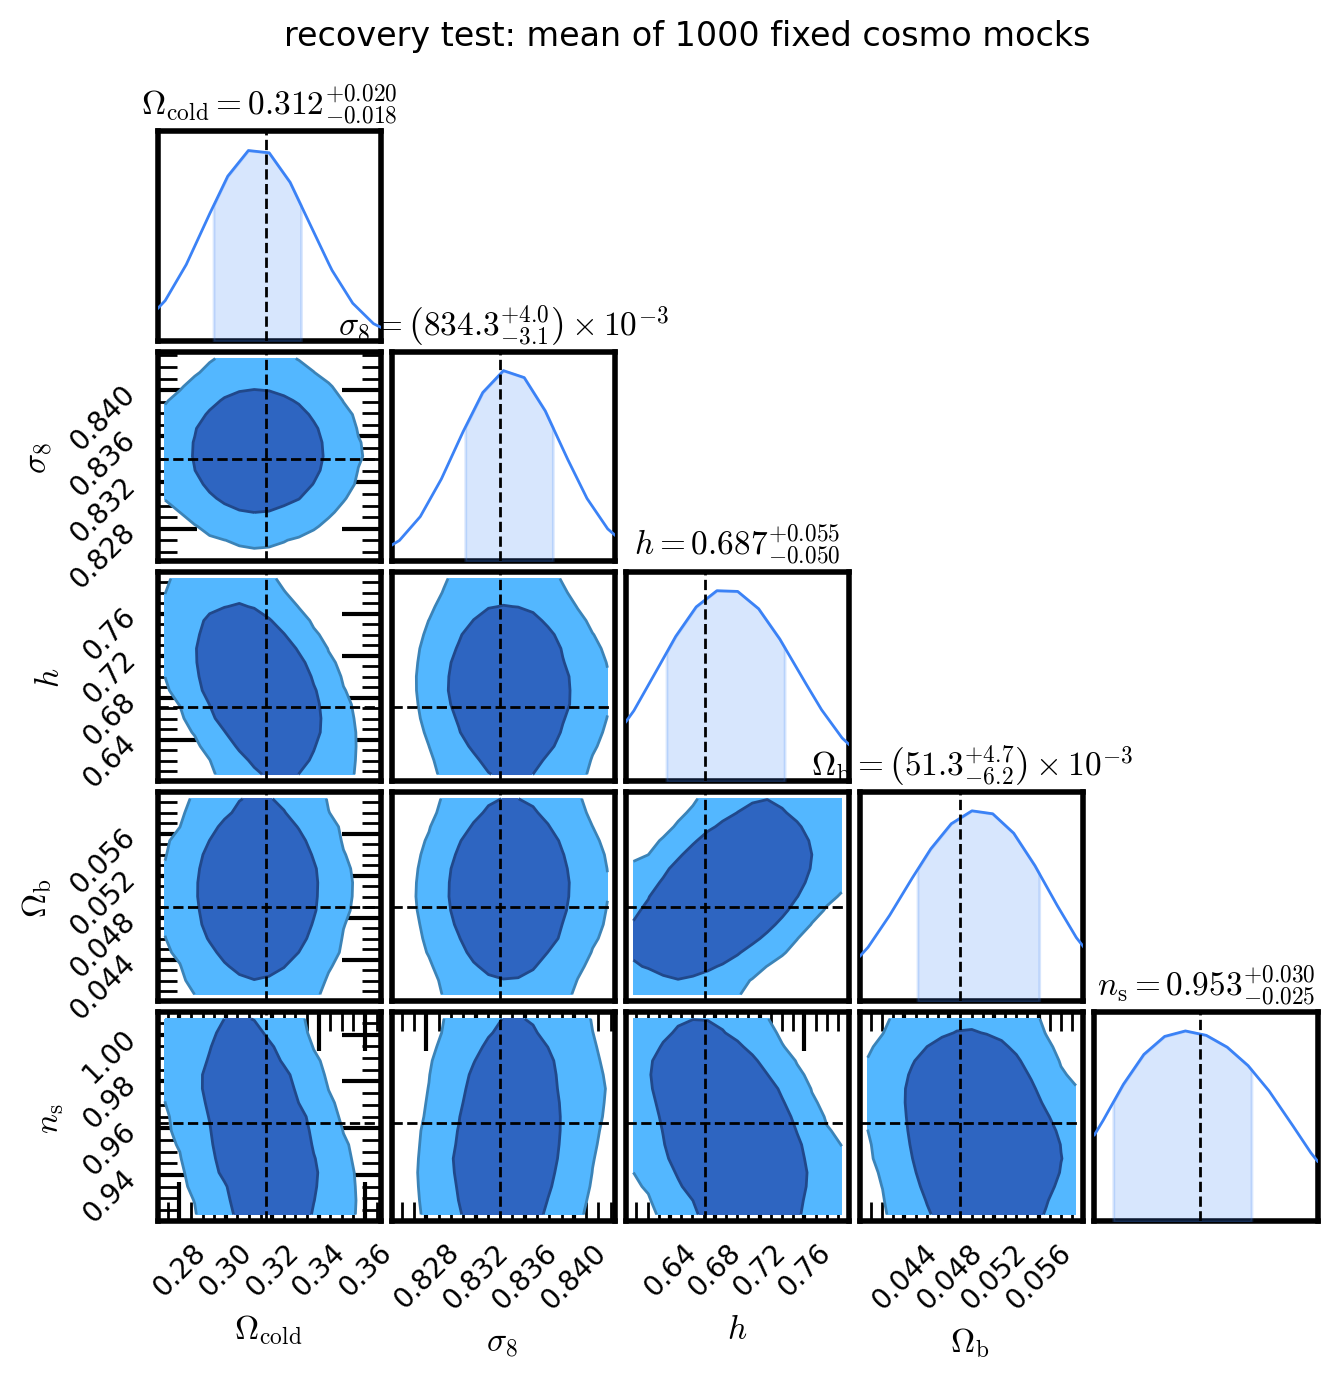

In [20]:
inf_methods = [
               'sbi',
              ]
tags_inf = [
            tag_inf,
            ]
tags_test = [
             f'{tag_data_test_fixed}_mean',
            ]
labels_extra = [
                '',
                ]
title = 'recovery test: mean of 1000 fixed cosmo mocks'
colors = ['blue']

param_names_vary = cosmo_param_names_vary

print(theta_test_fixed)
print(param_names_vary)
idx_obs = 0
plotter.plot_contours_inf(param_names_vary, idx_obs, theta_test_fixed, 
                        inf_methods, tags_inf, tags_test=tags_test,
                        colors=colors, labels_extra=labels_extra,
                        title=title)

Comparison

In [ ]:
inf_methods = [
               "sbi",
               'sbi',
               'sbi',
              ]
tags_inf = [
            f'_muchisimocksPk_p5_n10000_b1000_p0_n1_ntrain10000_best-sbi-rand10',
            # TODO switch to this best one when done running
            #f'_muchisimocksPk_p5_n10000_b1zen_p1_n10000_ntrain10000_best-sbi-rand10',
            f'_muchisimocksPk_p5_n10000_b1zen_p1_n10000_ntrain10000',
            f'_muchisimocksPk_p5_n10000_biaszen_p4_n10000_ntrain10000_best-sbi-rand10',
            ]
labels_extra = [
                'b=[1,0,0,0] (best)',
                'b1 free',
                'bias free (best)',
                ]
#colors = [ut
# ils.color_dict_methods[meth] for meth in inf_methods]
colors = ['blue', 'purple', 'cyan']

param_names_vary = cosmo_param_names_vary

[0.3175 0.834  0.6711 0.049  0.9624]
['omega_cold', 'sigma8_cold', 'hubble', 'omega_baryon', 'ns']
fn_samples = ../results/results_sbi/sbi_muchisimocksPk_p5_n10000_b1000_p0_n1_ntrain10000_best-sbi-rand10/samples_test_muchisimocksPk_quijote_p0_n1000_b1000_p0_n1_mean_pred.npy
(10000, 1, 5)
fn_samples = ../results/results_sbi/sbi_muchisimocksPk_p5_n10000_b1zen_p1_n10000_ntrain10000/samples_test_muchisimocksPk_quijote_p0_n1000_b1000_p0_n1_mean_pred.npy
(10000, 1, 6)
fn_samples = ../results/results_sbi/sbi_muchisimocksPk_p5_n10000_biaszen_p4_n10000_ntrain10000_best-sbi-rand10/samples_test_muchisimocksPk_quijote_p0_n1000_b1000_p0_n1_mean_pred.npy
(10000, 1, 9)


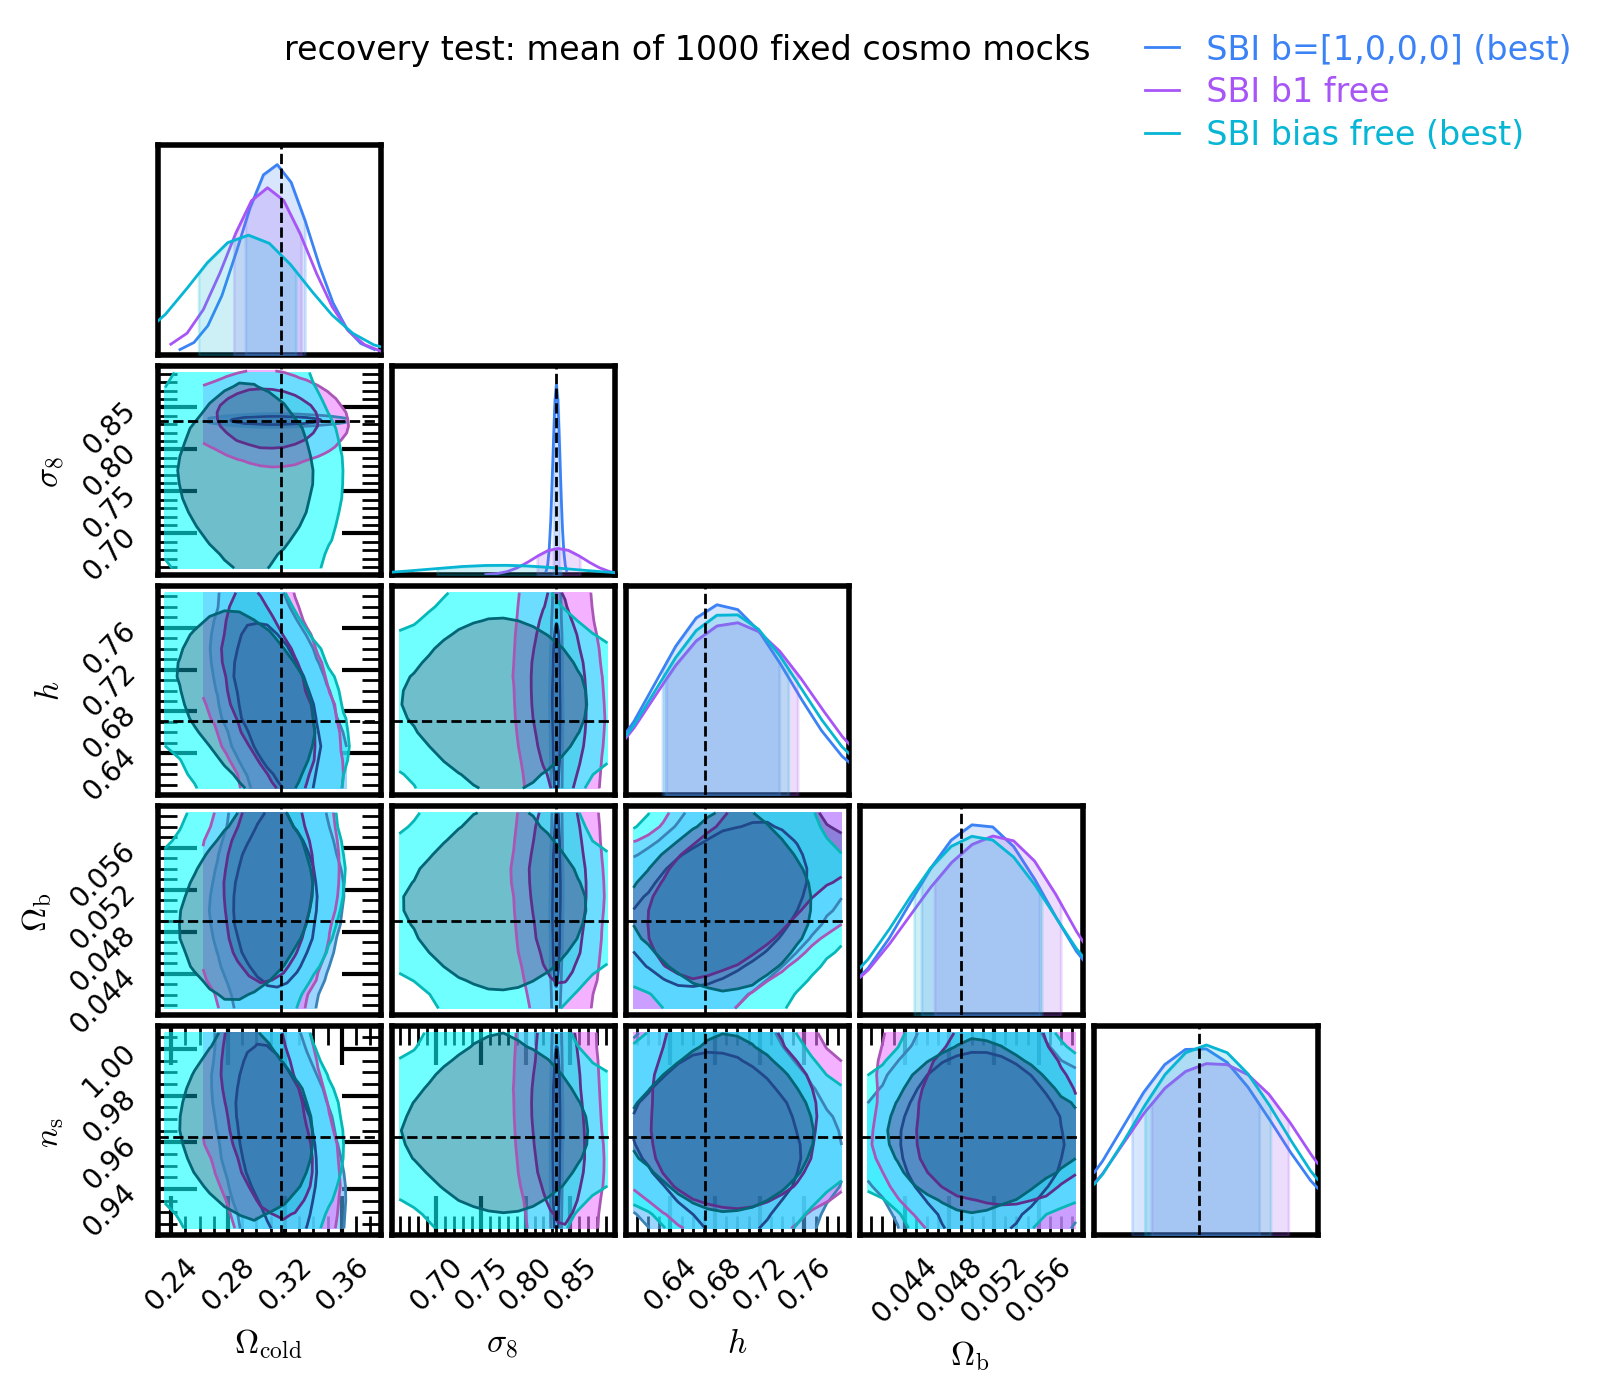

In [ ]:
print(theta_test_fixed)
print(param_names_vary)
idx_obs = 0
tags_test = [f'{tag_data_test_fixed}_mean']*len(tags_inf)
param_names_vary = cosmo_param_names_vary
plotter.plot_contours_inf(param_names_vary, idx_obs, theta_test_fixed, 
                        inf_methods, tags_inf, tags_test=tags_test,
                        colors=colors, labels_extra=labels_extra,
                        title=title)

## Coverage test for test set varying same params as training set

In [ ]:
# repeating here so easier to modify, but in theory, could just use settings above
inf_methods = [
               "sbi",
               'sbi',
               'sbi',
              ]
tags_inf = [
            f'_muchisimocksPk_p5_n10000_b1000_p0_n1_ntrain10000_best-sbi-rand10',
            f'_muchisimocksPk_p5_n10000_b1zen_p1_n10000_ntrain10000_best-sbi-rand10',
            #f'_muchisimocksPk_p5_n10000_biaszen_p4_n10000_ntrain10000_best-sbi-rand10',
            ]
labels_extra = [
                'b=[1,0,0,0] (best)',
                'b1 free',
                'bias free (best)',
                ]
#colors = [ut
# ils.color_dict_methods[meth] for meth in inf_methods]
colors = ['blue', 'purple', 'cyan']

param_names_vary = cosmo_param_names_vary

In [49]:
# load test set matched to training sest
tag_params_test = '_test_p5_n1000'
tags_biasparams_test = [
                        '_b1000_p0_n1',
                        '_b1zen_p1_n1000',
                        '_biaszen_p4_n1000',
                        ]
tag_datagen_test = ''
tags_data_test = ['_'+data_mode + tag_params_test + tag_biasparams_test + tag_datagen_test for tag_biasparams_test in tags_biasparams_test]
print(tag_data_test)
print(theta_test.shape)

_muchisimocksPk_test_p5_n1000_b1000_p0_n1
(1000, 5)


In [ ]:
#param_names_show = cosmo_param_names_vary + utils.biasparam_names_ordered
param_names_show = cosmo_param_names_vary + ['b1']
theta_true_arr, theta_pred_arr, vars_pred_arr = [], [], []
for i, tag_inf in enumerate(tags_inf):

    _theta_test_pred, _covs_test_pred, param_names  = utils.get_moments_test_sbi(tag_inf, tag_test=tags_data_test[i],
                                                                     #param_names=param_names_show
                                                                     )
    theta_test = data_loader.load_theta_test(tag_params_test, tags_biasparams_test[i])
    theta_true_inf, theta_pred_inf, vars_pred_inf = [], [], []
    for param_name_show in param_names_show:
        if param_name_show in param_names:
            idx_pn = list(param_names).index(param_name_show)
            theta_true_inf.append(theta_test[:,idx_pn])
            theta_pred_inf.append(_theta_test_pred[:,idx_pn])
            vars_pred_inf.append(_covs_test_pred[:,idx_pn,idx_pn])
            #covs_pred_arr.append(_covs_test_pred[:,idx_pn,idx_pn])
        else:
            nans = np.full(_theta_test_pred.shape[0], np.nan)
            theta_true_inf.append(nans)
            theta_pred_inf.append(nans)
            vars_pred_inf.append(nans)
            #covs_pred_arr.append(None)

    theta_true_arr.append(np.array(theta_true_inf).T)
    theta_pred_arr.append(np.array(theta_pred_inf).T)
    vars_pred_arr.append(np.array(vars_pred_inf).T)
    #covs_pred_arr.append(_covs_test_pred)
    
theta_true_arr = np.array(theta_true_arr)
theta_pred_arr = np.array(theta_pred_arr)
vars_pred_arr = np.array(vars_pred_arr)
# covs_pred_arr = np.array(covs_pred_arr)

['omega_cold', 'sigma8_cold', 'hubble', 'omega_baryon', 'ns', 'b1']
(10000, 1000, 5)
_muchisimocksPk_p5_n10000_b1000_p0_n1_ntrain10000_best-sbi-rand10
(1000, 5)
(10000, 1000, 6)
_muchisimocksPk_p5_n10000_b1zen_p1_n10000_ntrain10000_best-sbi-rand10
(1000, 6)


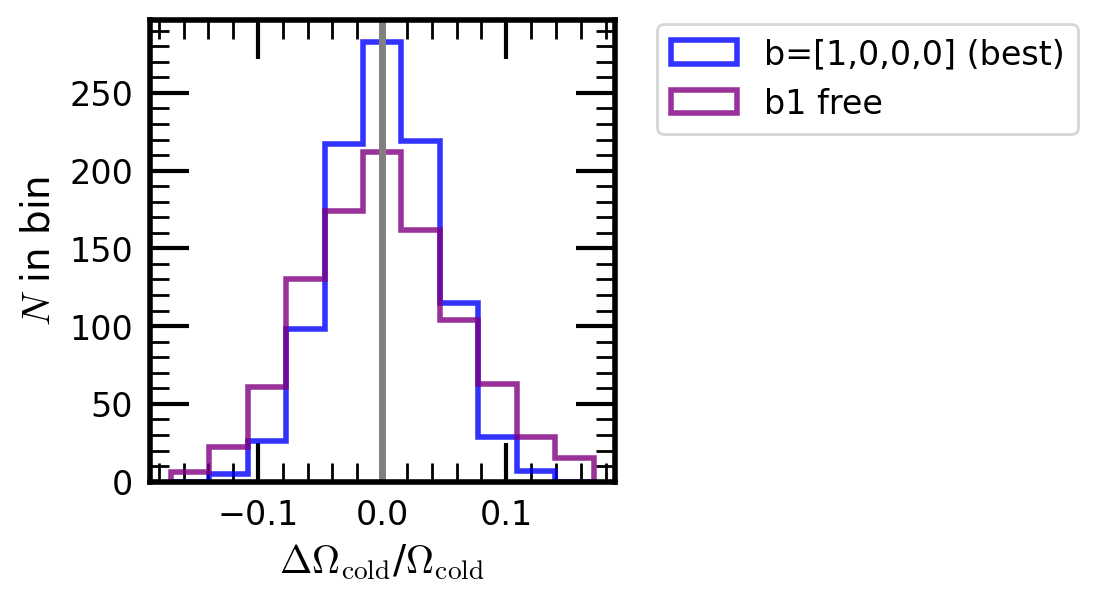

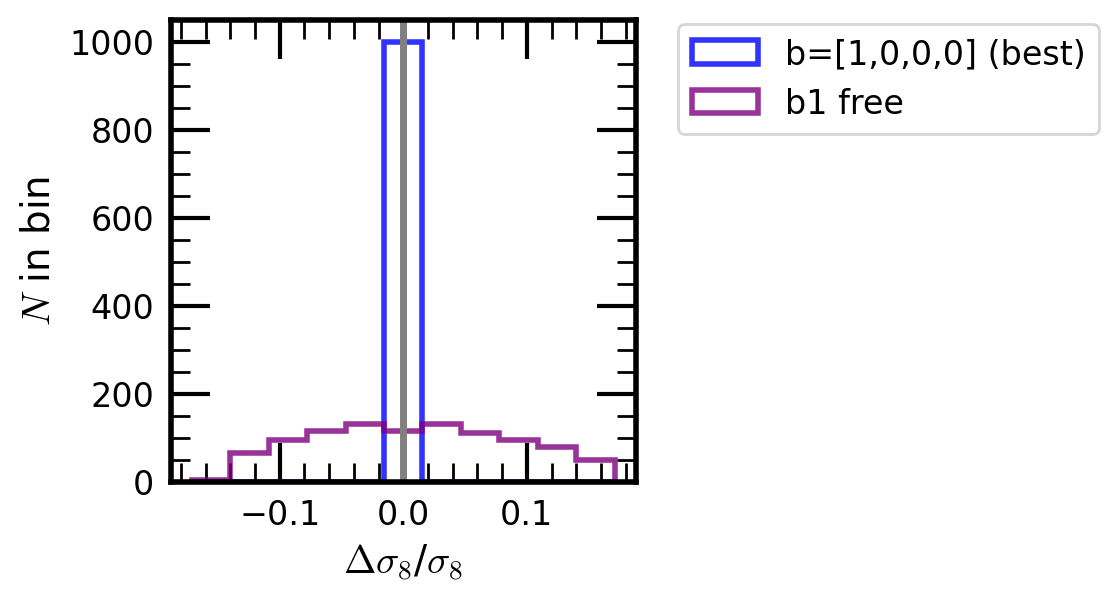

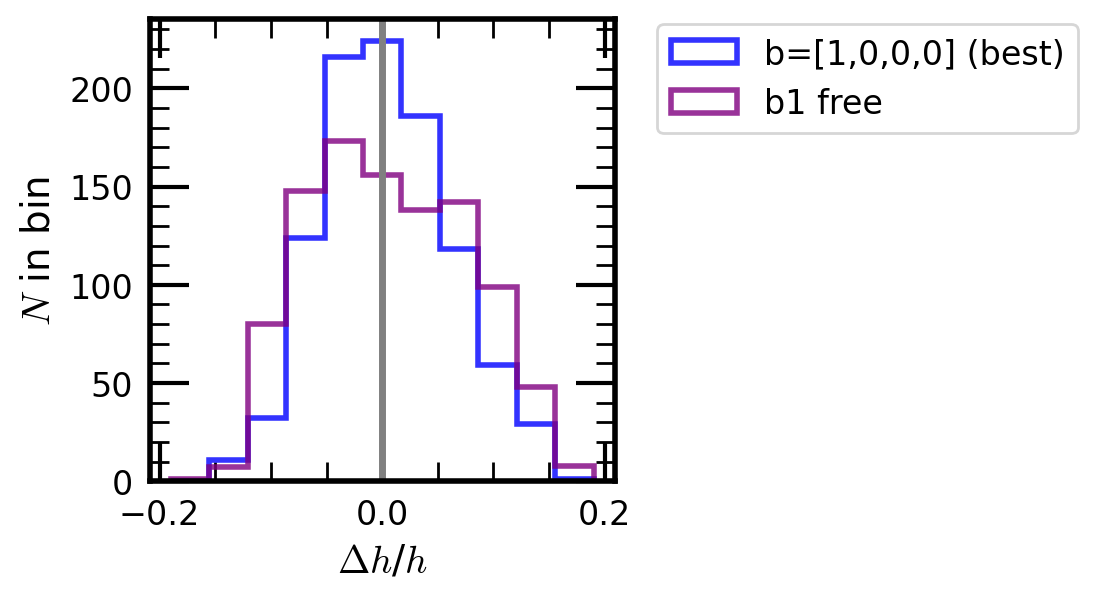

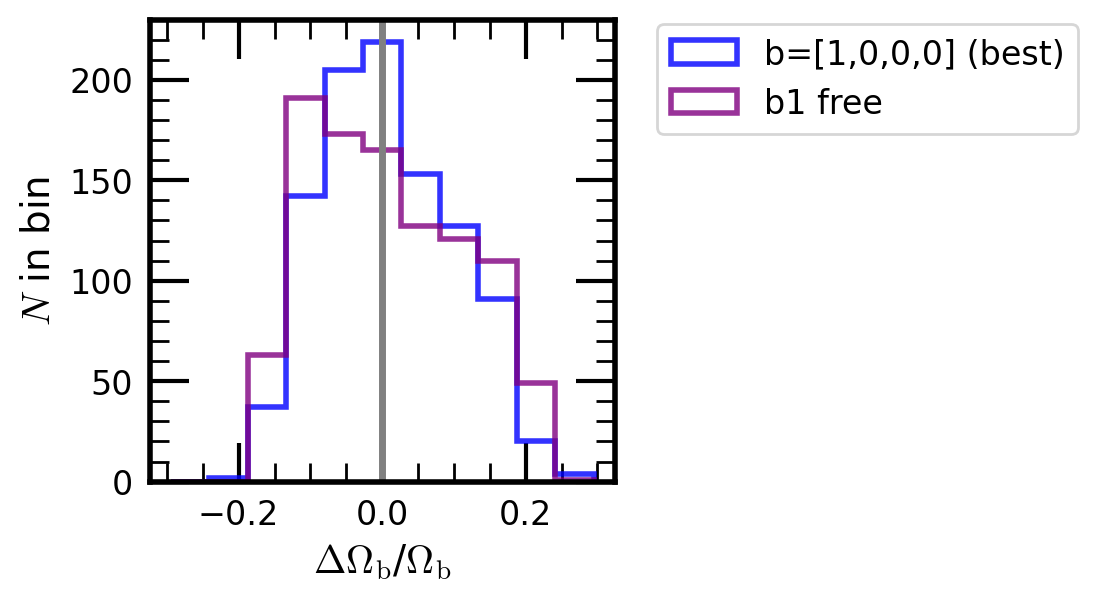

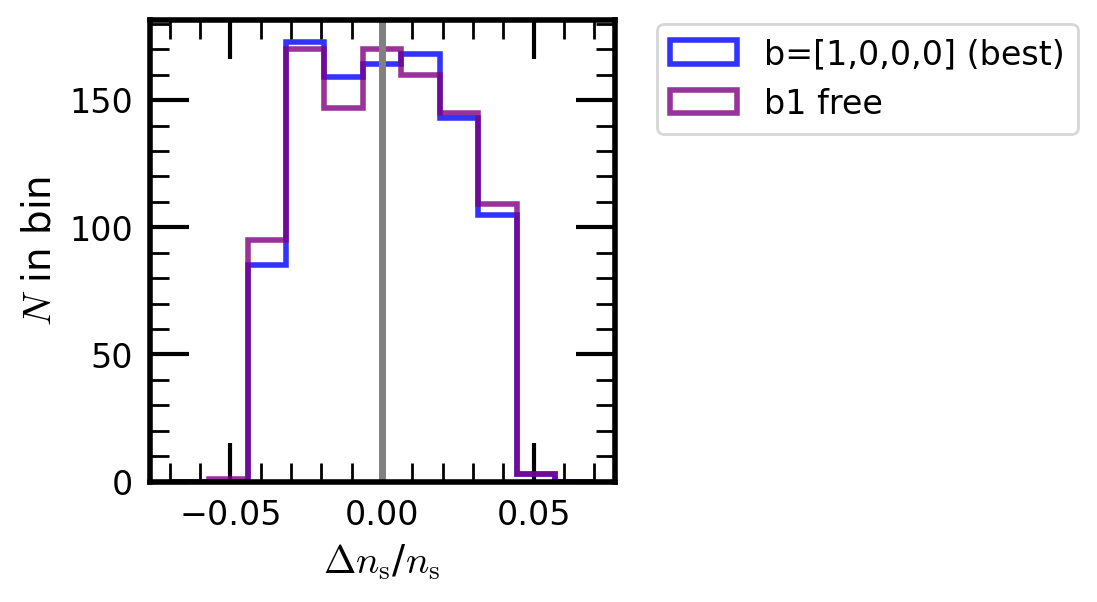

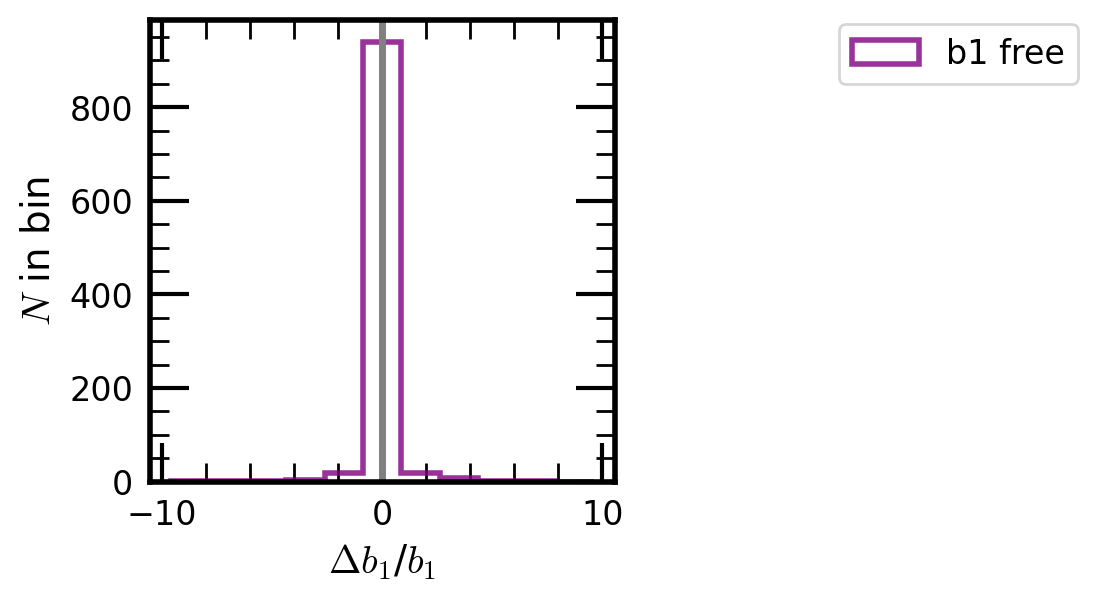

In [99]:
param_labels = [utils.param_label_dict[pns] for pns in param_names_show]
plotter.plot_hists_mean(theta_pred_arr, theta_true_arr, param_labels, 
                        color_arr=colors, label_arr=labels_extra,
                        n_bins=12, alpha=0.8, histtype='step',
                        xlim_auto=False)

/home/kstoreyf/.conda/envs/benv/lib/python3.11/site-packages/matplotlib/axes/_axes.py:6973: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/kstoreyf/.conda/envs/benv/lib/python3.11/site-packages/matplotlib/axes/_axes.py:6974: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/home/kstoreyf/.conda/envs/benv/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


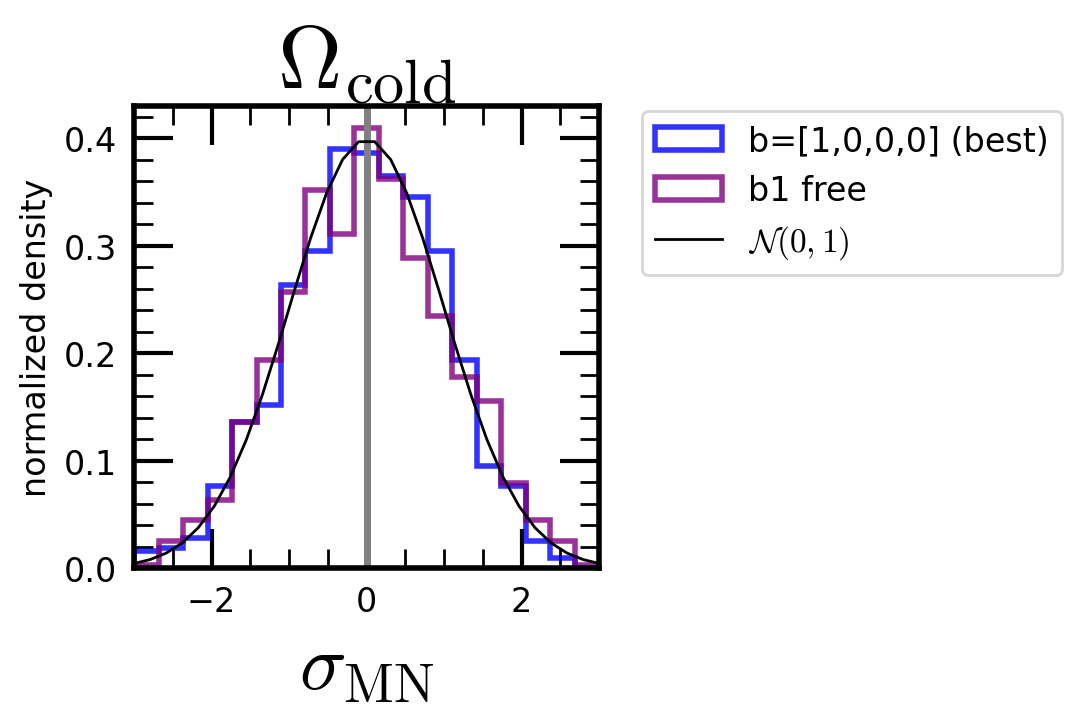

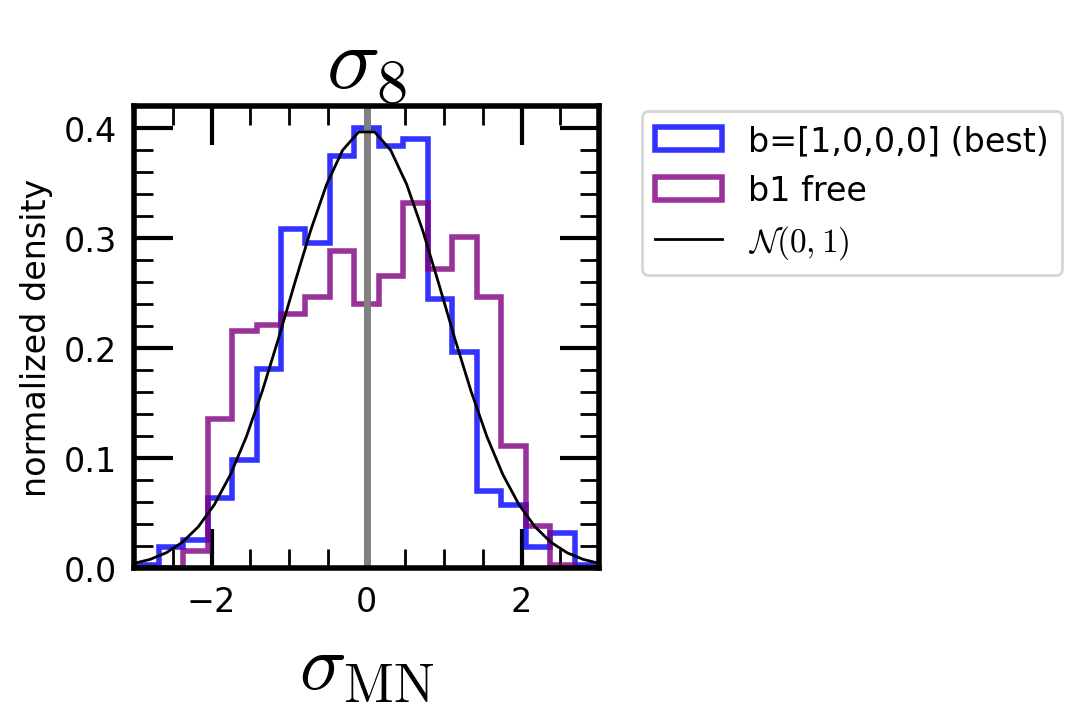

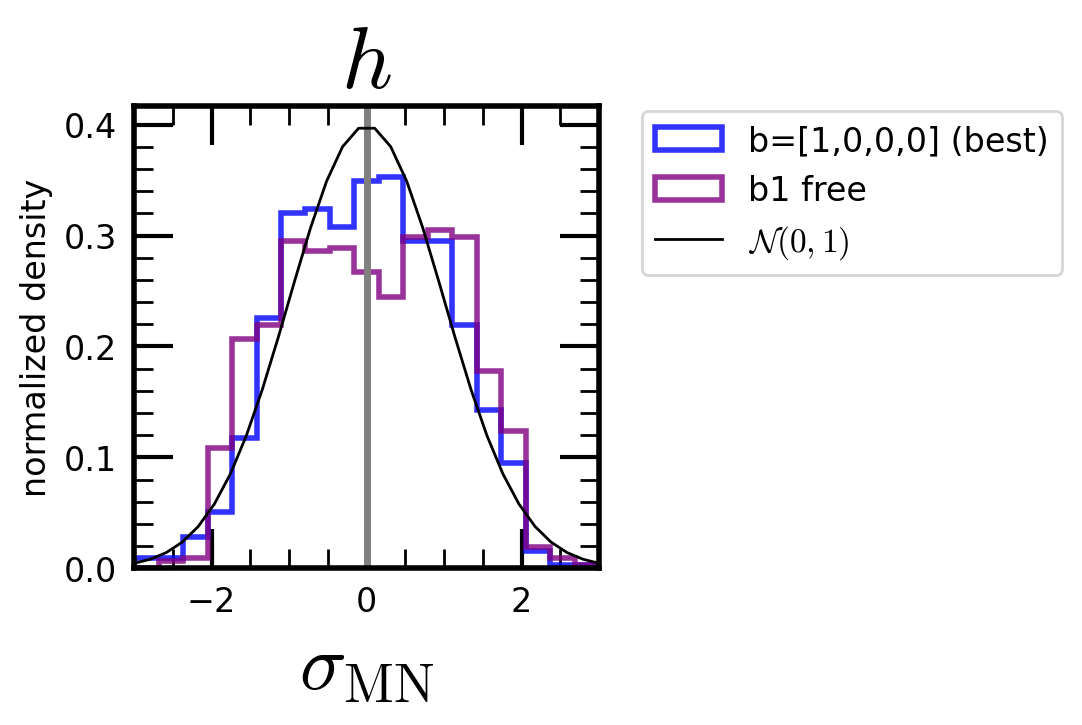

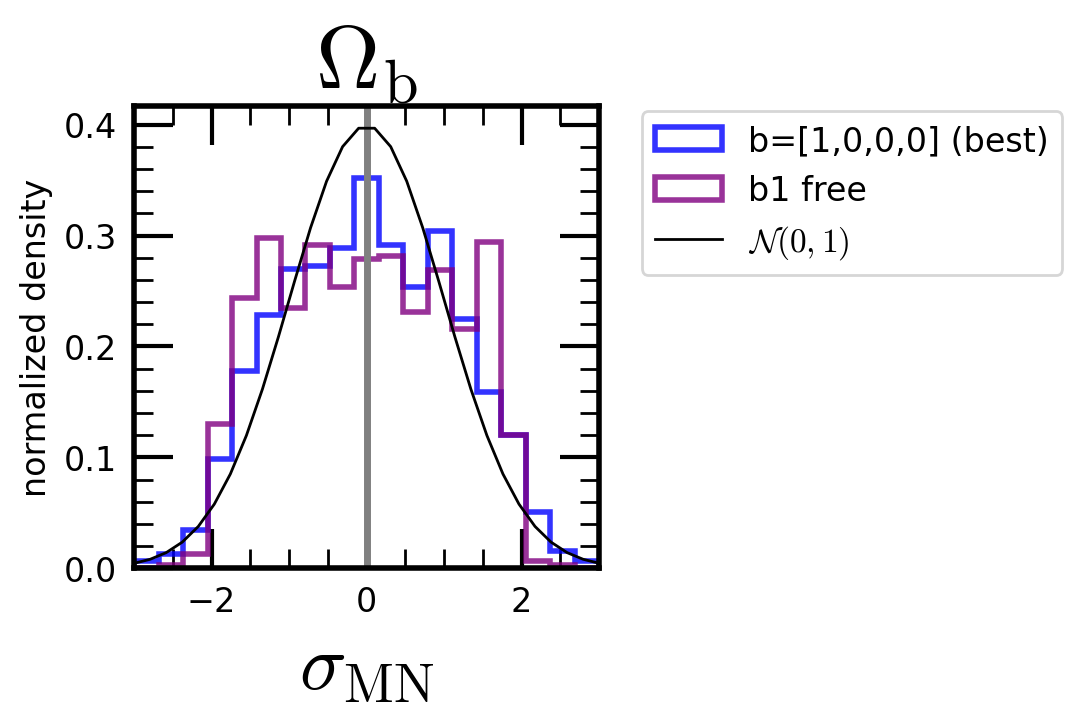

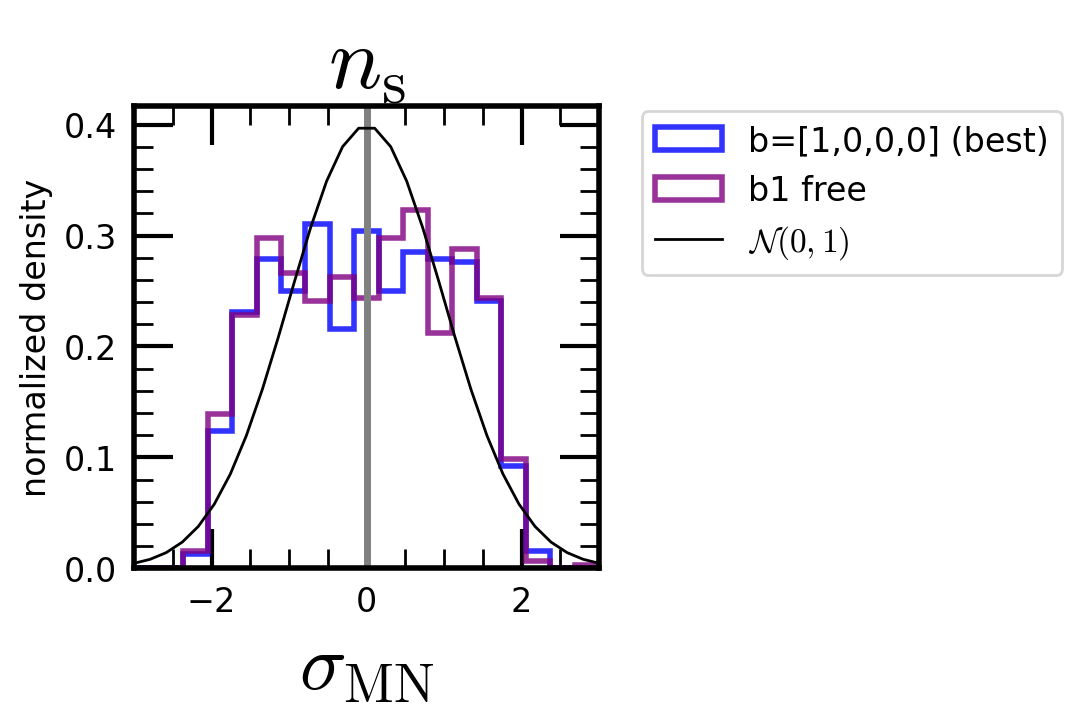

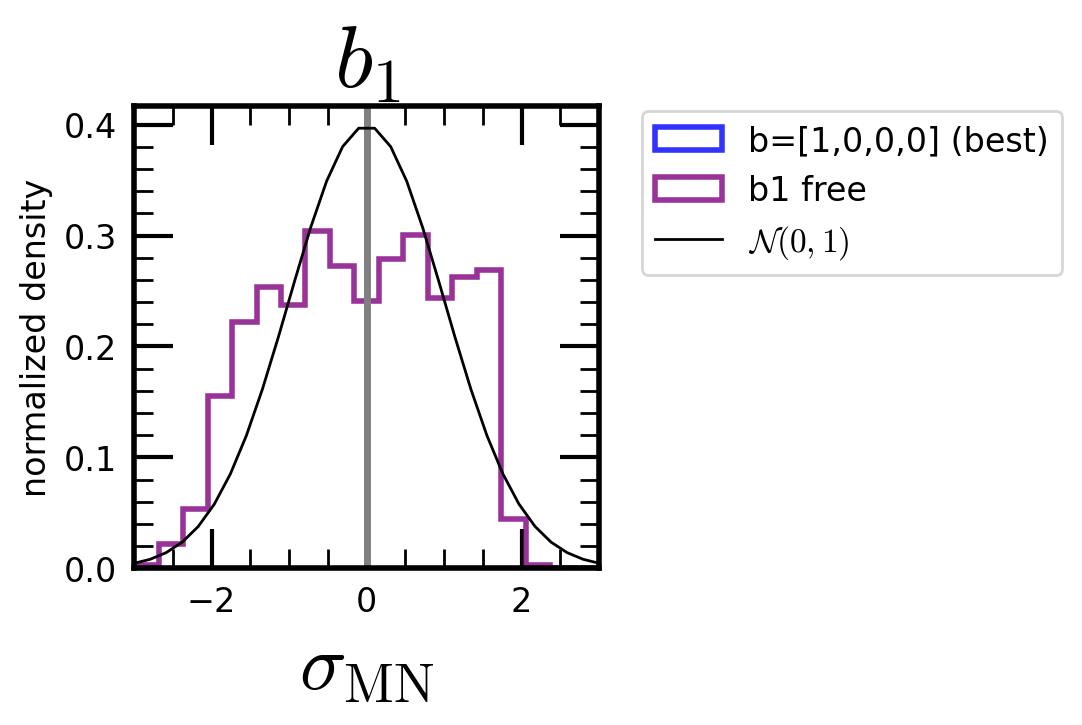

In [105]:
plotter.plot_hists_var(theta_true_arr, theta_pred_arr, vars_pred_arr, param_labels,
                        color_arr=colors, label_arr=labels_extra,
                        #bins=10, 
                        alpha=0.8, histtype='step')

## check out full parameter space

In [117]:
tag_params = '_p5_n10000'
tag_biasparams = '_biaszen_p4_n10000'
tag_biasparams_x10 = '_biaszen_p4_n100000'

inf_methods = [
              # "sbi",
               'sbi',
               'sbi',
              ]
tags_inf = [
            #f'_muchisimocksPk_p5_n10000_b1000_p0_n1_ntrain10000_best-sbi-rand10',
            # TODO switch to this best one when done running
            #f'_muchisimocksPk_p5_n10000_b1zen_p1_n10000_ntrain10000_best-sbi-rand10',
            #f'_muchisimocksPk_p5_n10000_b1zen_p1_n10000_ntrain10000',
            f'_muchisimocksPk{tag_params}{tag_biasparams}_ntrain10000_best-sbi-rand10',
            f'_muchisimocksPk{tag_params}{tag_biasparams_x10}_ntrain100000',
            ]
labels_extra = [
                #'b=[1,0,0,0] (best)',
                #'b1 free',
                'bias free (best)',
                'bias free (x10)',
                ]
#colors = [ut
# ils.color_dict_methods[meth] for meth in inf_methods]
colors = [
          #'blue', 
          #'purple', 
          'cyan',
          'green']

In [118]:
# load training set parameters 
params_df, param_dict_fixed, biasparams_df, biasparams_dict_fixed, random_ints, random_ints_bias = data_loader.load_params(tag_params, tag_biasparams)

# for muchisimocks, we will probably want to vary the same params as the training data
cosmo_param_names_vary, bias_param_names_vary = [], []
if params_df is not None:
    cosmo_param_names_vary = params_df.columns.tolist()
# TODO should this be test or train?
if biasparams_df is not None:
    bias_param_names_vary = biasparams_df.columns.tolist()
param_names_vary = cosmo_param_names_vary + bias_param_names_vary
param_labels = [utils.param_label_dict[param_name] for param_name in param_names_vary]

In [119]:
# load fixed-cosmo test set
tag_params_test = '_quijote_p0_n1000'
tag_biasparams_test = '_b1000_p0_n1'
tag_datagen_test = ''
tag_data_test_fixed = '_'+data_mode + tag_params_test + tag_biasparams_test + tag_datagen_test
print(tag_data_test_fixed)
theta_test_fixed = data_loader.load_theta_test(tag_params_test, tag_biasparams_test, 
                                cosmo_param_names_vary=cosmo_param_names_vary, bias_param_names_vary=bias_param_names_vary)
print(theta_test_fixed.shape)

_muchisimocksPk_quijote_p0_n1000_b1000_p0_n1
(9,)


[0.3175 0.834  0.6711 0.049  0.9624 1.     0.     0.     0.    ]
['omega_cold', 'sigma8_cold', 'hubble', 'omega_baryon', 'ns', 'b1', 'b2', 'bs2', 'bl']
fn_samples = ../results/results_sbi/sbi_muchisimocksPk_p5_n10000_biaszen_p4_n10000_ntrain10000_best-sbi-rand10/samples_test_muchisimocksPk_quijote_p0_n1000_b1000_p0_n1_mean_pred.npy
(10000, 1, 9)
fn_samples = ../results/results_sbi/sbi_muchisimocksPk_p5_n10000_biaszen_p4_n100000_ntrain100000/samples_test_muchisimocksPk_quijote_p0_n1000_b1000_p0_n1_mean_pred.npy
(10000, 1, 9)


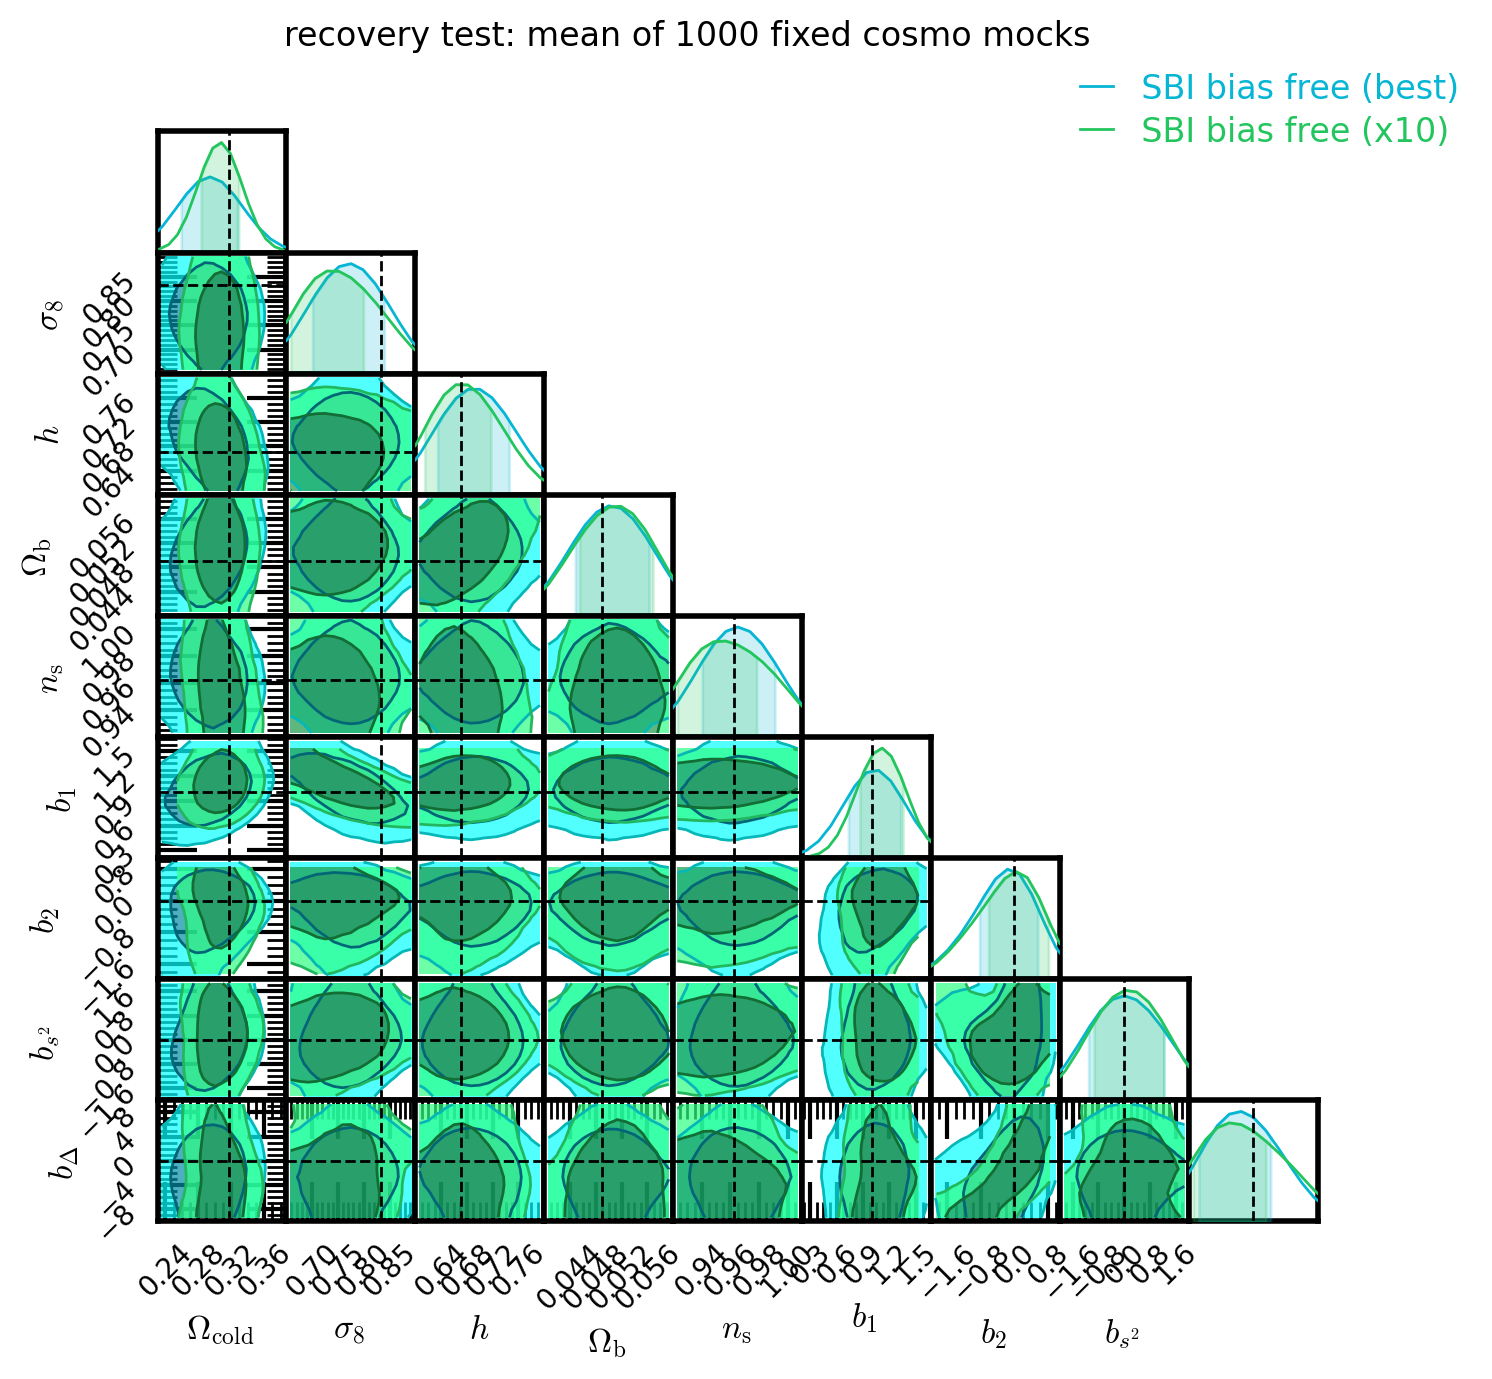

In [120]:
print(theta_test_fixed)
print(param_names_vary)
idx_obs = 0
tags_test = [f'{tag_data_test_fixed}_mean']*len(tags_inf)
param_names_vary = cosmo_param_names_vary + utils.biasparam_names_ordered
plotter.plot_contours_inf(param_names_vary, idx_obs, theta_test_fixed, 
                        inf_methods, tags_inf, tags_test=tags_test,
                        colors=colors, labels_extra=labels_extra,
                        title=title)

In [121]:
param_names_show = cosmo_param_names_vary + utils.biasparam_names_ordered
#param_names_show = cosmo_param_names_vary + ['b1']
theta_true_arr, theta_pred_arr, vars_pred_arr = [], [], []
for i, tag_inf in enumerate(tags_inf):

    _theta_test_pred, _covs_test_pred, param_names  = utils.get_moments_test_sbi(tag_inf, tag_test=tags_data_test[i],
                                                                     #param_names=param_names_show
                                                                     )
    theta_test = data_loader.load_theta_test(tag_params_test, tags_biasparams_test[i])
    theta_true_inf, theta_pred_inf, vars_pred_inf = [], [], []
    for param_name_show in param_names_show:
        if param_name_show in param_names:
            idx_pn = list(param_names).index(param_name_show)
            theta_true_inf.append(theta_test[:,idx_pn])
            theta_pred_inf.append(_theta_test_pred[:,idx_pn])
            vars_pred_inf.append(_covs_test_pred[:,idx_pn,idx_pn])
            #covs_pred_arr.append(_covs_test_pred[:,idx_pn,idx_pn])
        else:
            nans = np.full(_theta_test_pred.shape[0], np.nan)
            theta_true_inf.append(nans)
            theta_pred_inf.append(nans)
            vars_pred_inf.append(nans)
            #covs_pred_arr.append(None)

    theta_true_arr.append(np.array(theta_true_inf).T)
    theta_pred_arr.append(np.array(theta_pred_inf).T)
    vars_pred_arr.append(np.array(vars_pred_inf).T)
    #covs_pred_arr.append(_covs_test_pred)
    
theta_true_arr = np.array(theta_true_arr)
theta_pred_arr = np.array(theta_pred_arr)
vars_pred_arr = np.array(vars_pred_arr)
# covs_pred_arr = np.array(covs_pred_arr)

FileNotFoundError: [Errno 2] No such file or directory: '../results/results_sbi/sbi_muchisimocksPk_p5_n10000_biaszen_p4_n10000_ntrain10000_best-sbi-rand10/samples_test_muchisimocksPk_test_p5_n1000_b1000_p0_n1_pred.npy'

In [ ]:
param_labels = [utils.param_label_dict[pns] for pns in param_names_show]
plotter.plot_hists_mean(theta_pred_arr, theta_true_arr, param_labels, 
                        color_arr=colors, label_arr=labels_extra,
                        n_bins=12, alpha=0.8, histtype='step',
                        xlim_auto=False)

In [ ]:
plotter.plot_hists_var(theta_true_arr, theta_pred_arr, vars_pred_arr, param_labels,
                        color_arr=colors, label_arr=labels_extra,
                        #bins=10, 
                        alpha=0.8, histtype='step')